## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

In [1]:
#DONT FORGET TO CLOSE CONNECTION

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [2]:
import sqlite3 as sql
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

In [3]:
baseball = sql.connect("/Users/Troy/Downloads/baseball.sqlite")
baseball

In [4]:
cur = baseball.execute("SELECT * FROM sqlite_master")
#cur.fetchall()

***Exercise 1.1.1:***
From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salries for all people on the team in a given year.

In [5]:
pd.read_sql("""
    SELECT DISTINCT s.yearid, s.teamid, name, payroll FROM
        (SELECT yearid, teamid, sum(salary) as payroll FROM 
        salaries
        WHERE yearid BETWEEN 2006 AND 2016
        GROUP BY teamID, yearID) AS s
    INNER JOIN
        (SELECT yearid, teamid, name FROM teams
        WHERE yearid BETWEEN 2006 AND 2016
        GROUP BY teamID, yearID
        ) AS t
        ON s.teamid = t.teamid
    GROUP BY s.teamID, s.yearID
    ORDER BY payroll
    DESC
    LIMIT 20
        ;
""", baseball)

,yearid,teamid,name,payroll
0,2013,NYA,New York Yankees,231978886
1,2013,LAN,Los Angeles Dodgers,223362196
2,2016,NYA,New York Yankees,222997792
3,2016,LAN,Los Angeles Dodgers,221288380
4,2014,LAN,Los Angeles Dodgers,217014600
5,2015,LAN,Los Angeles Dodgers,215792000
6,2015,NYA,New York Yankees,212751957
7,2008,NYA,New York Yankees,207896789
8,2010,NYA,New York Yankees,206333389
9,2011,NYA,New York Yankees,202275028


***Answer 1.1.1:***

From 2006 to 2016, the 5 teams with the highest payrolls from most to least included the New York Yankees, Los Angeles Dodgers, Detroit Tigers, Boston Red Sox, and Philadelphia Phillies. The years and payroll that these teams had the highest of their payrolls included the New York Yankees in 2013 with 231,978,886, Los Angeles Dogers in 2013 with 223,362,196, Detroit Tigers in 2016 with 194,876,481, Boston Red Sox in 2016 with 188,545,761, and Philadelphia Phillies in 2014 with 180,944,967. Some interesting things to note is that the New York Yankees and Los Angeles Dodgers had the highest payrolls for 13 rows before the Detroit Tigers were added to the mix. 

***Exercise 1.1.2:*** Is there any general trend in payrolls over this time period?

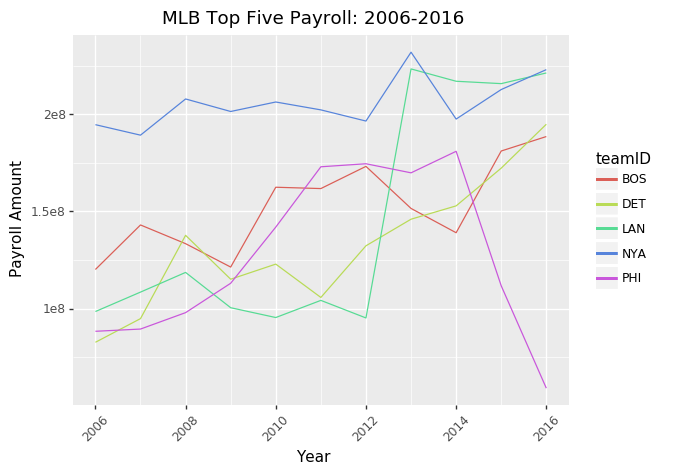

<ggplot: (-9223372029303072645)>

In [6]:
salary_per_year = pd.read_sql("""SELECT SUM(salary) AS payroll, teamID, yearid FROM salaries 
WHERE teamid IN ('NYA', 'BOS', 'LAN', 'DET','PHI')
AND
yearid BETWEEN 2006 AND 2016 
GROUP BY teamid, yearid
ORDER BY payroll 
DESC
;
""", baseball)

(
    ggplot(salary_per_year, aes(x = "yearID", y = "payroll", color = "teamID")) + geom_line() 
    + theme(axis_text_x=element_text(angle=45))
    + labs(title = "MLB Top Five Payroll: 2006-2016", x = "Year", y = "Payroll Amount")
)

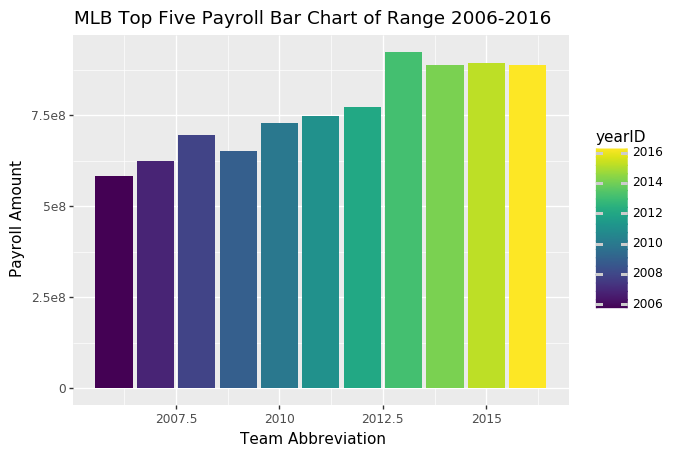

<ggplot: (7551715620)>

In [7]:
salary_per_year2 = pd.read_sql("""SELECT SUM(salary) AS payroll, yearid FROM salaries 
WHERE teamid IN ('NYA', 'BOS', 'LAN', 'DET','PHI')
AND
yearid BETWEEN 2006 AND 2016 
GROUP BY yearid
ORDER BY payroll 
DESC
;
""", baseball)

(
    ggplot(salary_per_year2, aes(x = "yearID", y = "payroll", fill = "yearID")) + geom_col() 
    + labs(title = "MLB Top Five Payroll Bar Chart of Range 2006-2016", x = "Team Abbreviation", y = "Payroll Amount")
)

In [8]:
#salary_per_year2  ##specific values per year

***Answer 1.1.2:***

When looking the line plots of the top five payroll teams during from 2006-2016, we can see that the New York Yankees, Boston Red Sox, Detroit Tigers, and Philadelphia Phillies have had a constant upward trend throughout the years. The Los Angeles Dodgers had a constant downward trend in payroll until 2012 where they shot upward. The opposite can be said for the Philadelphia Phillies where they had a constant upward trend until 2014 where they shot downward in payroll amount.

To explore this further and look for an overall trend for these five teams, a bar chart was created for all the five teams per year during the time period. From this bar chart, it wound found that from 2006 to 2016, the total payroll amount has had a roughly upward trend. All in all, as the years went on through this time period, the amount of payroll would generally increase. To quantify this difference, from 2006 to 2016 there was an overall change in payroll amount of 338,627,482, which is approximately a 58% increase from 2006. 

***Exercise 1.1.3:*** There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

In [9]:
anomaly_1 = pd.read_sql("""SELECT SUM(salary) AS payroll, teamID, yearid FROM salaries 
WHERE teamid IN ('LAN')
AND
yearid BETWEEN 2012 AND 2013 
GROUP BY teamid, yearid
ORDER BY payroll 
DESC
;
""", baseball)
anomaly_1

,payroll,teamID,yearID
0,223362196,LAN,2013
1,95143575,LAN,2012


In [10]:
anomaly_2 = pd.read_sql("""SELECT SUM(salary) AS payroll, teamID, yearid FROM salaries 
WHERE teamid IN ('PHI')
AND
yearid BETWEEN 2014 AND 2016
GROUP BY teamid, yearid
ORDER BY payroll 
DESC
;
""", baseball)
anomaly_2

,payroll,teamID,yearID
0,180944967,PHI,2014
1,111693000,PHI,2015
2,58980000,PHI,2016


***Answer 1.1.3:***

To preface, both anomalies are illustrated within the line plot within exercise 1.1.2. 

**Anomaly 1:** 

The first anomaly within the payrolls over this time period is from the Los Angeles Dodgers during the year 2013. During this time, the Los Angeles Dodger's payroll increased dramatically from 95,143,575 to 223,362,196, which is approximately a 135% increase. 

From articles pertaining the payroll increase, USA Today explains that the payroll increase can be explained by the Los Angeles Dodgers' moves in free agency to acquire expensive pieces such as Zack Greinke who signed a 147 million six-year contract and Ryu Hyun-jin who signed a 36 million six-year contract. In addition to this, the influence of spending a lot of money could be accredited to Magic Johnson who took over the team with others and was quoted saying, "When we took over the team we said we were going to spend money and I guess you guys are seeing that we're trying to do that...We're not talking about it, we're doing it." 

**Anomaly 2:**

The second anomaly within the payrolls over this time period is from the Philadelphia Phillies from 2014 to 2016. During this time, the Philadelphia Phillies payroll decreased dramatically from 180,944,967 to 58,980,000, which is approximately a 67% decrease. 

According to an article from 2016, the low payroll of the Phillies team is due to a lack of large contracts from the team. The largest contract from the team was from Odubel Herrera who got a 30.5 million five-year extension, which is one indicator for why the payroll got so low. 

**References:**

Anomaly 1: 

https://www.usatoday.com/story/sports/mlb/dodgers/2012/12/12/los-angeles-dodgers-new-york-yankees-2013-major-league-baseball-payroll/1765749/ 

https://www.truebluela.com/2013/4/1/4169010/2013-dodgers-payroll-opening-day 

Anomaly 2: 

https://thatballsouttahere.com/2016/12/20/phillies-fifth-lowest-payroll-2016/

***Exercise 1.1.4:*** How do the top 5 teams compare to other teams?

Text(0, 0.5, 'Year')

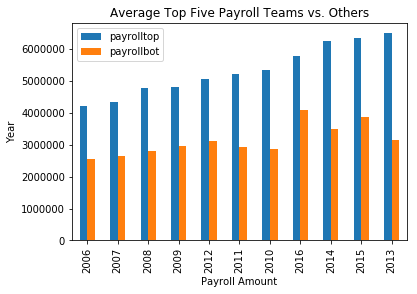

In [11]:
top_five = pd.read_sql("""SELECT payrolltop, payrollbot, tf.yearid FROM
(SELECT AVG(salary) AS payrolltop, yearid FROM salaries 
WHERE teamid IN ('NYA', 'BOS', 'LAN', 'DET','PHI')
AND
yearid BETWEEN 2006 AND 2016 
GROUP BY yearid
ORDER BY payrolltop
ASC) as tf
INNER JOIN
(SELECT AVG(salary) AS payrollbot, yearid FROM salaries
WHERE NOT teamid IN ('NYA', 'BOS', 'LAN', 'DET','PHI')
AND
yearid BETWEEN 2006 AND 2016 
GROUP BY yearid
ORDER BY payrollbot 
ASC) as tr
ON tf.yearid = tr.yearid
;
""", baseball)

top_five.plot(x = "yearid", y = ["payrolltop", "payrollbot"], kind = "bar", 
              title = "Average Top Five Payroll Teams vs. Others")
plt.xlabel('Year')
plt.ylabel('Payroll Amount') 

***Answer 1.1.4:***

As shown by the side-by-side bar charts, the top five payroll having teams' average payroll per year is much higher than the average payroll of all the other teams in the league. This makes sense since we did subset the top five teams for payroll in the MLB. Looking at the bar chart the difference between averages is roughly a 35-50% difference. Also, as the years go on, the disparity between the top five and the rest of the teams seems to differ more and more since the distribution of the "other" teams doesn't have a constant upward trend like the top five teams do. 

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

**Question 1:**  What is the average ranking of teams in the past 10 years (2009-2018)? Compare average ranking of teams to the average payroll of the teams during this time period. Is there a pattern between the amount that a team pays their players and final rankings?

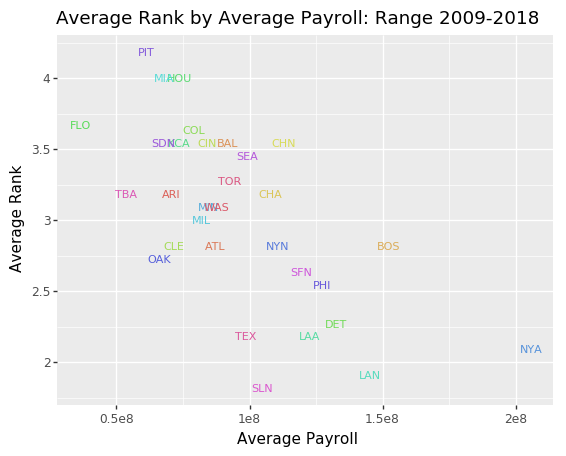

<ggplot: (7541008697)>

In [12]:
payroll_avgOT = pd.read_sql(""" SELECT payrollAvg, without.teamid, without.averageRank, name FROM
(SELECT payrollAvg, one.teamid, averageRank FROM 
(SELECT DISTINCT AVG(payroll) AS payrollAvg, yearid, teamid FROM
(SELECT DISTINCT SUM(salary) AS payroll, yearid, teamid FROM salaries
WHERE yearid BETWEEN 2006 AND 2016
GROUP BY yearid, teamid)
GROUP BY teamid) AS one 
LEFT JOIN
(SELECT DISTINCT AVG(rank) AS averageRank, yearid, teamid FROM teams
WHERE yearid BETWEEN 2006 AND 2016
GROUP BY teamid) AS two 
ON one.teamid = two.teamid
ORDER BY averageRank) AS without
LEFT JOIN
(SELECT yearid, teamid, name FROM teams
WHERE yearid BETWEEN 2006 AND 2016
GROUP BY teamID) AS with
ON without.teamid = with.teamid 
;""", baseball)

(
    ggplot(payroll_avgOT, aes(x = "payrollAvg", y = "averageRank", color = "teamid"))
    + geom_text(aes(label = "teamid"), size = 8)
    + labs(title = "Average Rank by Average Payroll: Range 2009-2018", x = "Average Payroll", y = "Average Rank")
    + theme(legend_position = "none")
)

##ggplot geom_point() with geom_text() referring to baseball team name was considered but made the plot too cluttered

In [13]:
payroll_avgOT

,payrollAvg,teamid,averageRank,name
0,1.047140e+08,SLN,1.818182,St. Louis Cardinals
1,1.452775e+08,LAN,1.909091,Los Angeles Dodgers
2,2.057883e+08,NYA,2.090909,New York Yankees
3,1.224601e+08,LAA,2.181818,Los Angeles Angels of Anaheim
4,9.864167e+07,TEX,2.181818,Texas Rangers
5,1.324595e+08,DET,2.272727,Detroit Tigers
6,1.272282e+08,PHI,2.545455,Philadelphia Phillies
7,1.195457e+08,SFN,2.636364,San Francisco Giants
8,6.609561e+07,OAK,2.727273,Oakland Athletics
9,8.695963e+07,ATL,2.818182,Atlanta Braves


**Answer 1**

The average ranks of the teams during this time period is shown and ordered from best rank to worst rank over the time period of 2006 to 2016. When taking an initial look at the text plot, we can see that the Los Angeles Dodgers and New York Yankees average ranks were 2nd and 3rd highest respectively. This does seem to make sense given that payroll affects how well a team ranks (since this suggests their players may be more skilled) because the Yankees and Dodgers were listed as the highest average payroll teams during the time period 2006 to 2016 as well. 

When looking at the overall trend of the text plot, we can see that there is a downward trend that suggests higher average payroll is correlated with a higher average rank during 2006 to 2016. One thing to keep in mind is that the smaller the rank is, the better ranked a team is with highest rank being 1. All in all, this overall trend suggests that the higher average payroll a team spends the higher average rank they usually obtain; however, this isn't an absolute phenomenon since teams like the Boston Red Sox have the 2nd in highest average payroll but are ranked 10th in average ranking. Many variables including randomness and potential injuries of players can contribute to the overall final rankings for the season. 

**Question 2:** Are awards received related to player salary? Is there a pattern between number of awards and average player salaries during 2016? Is this pattern different from the old MLB such as the 1990s?

In [14]:
#look at number of awards received
#or just received an award at some point #use count
awards2016 = pd.read_sql("""SELECT sal.playerid, AVG(salary) AS salaryAvg, NumberofAwards FROM
((SELECT playerid, yearid, salary FROM salaries 
WHERE yearid = 2016) AS sal
LEFT JOIN
(SELECT playerid, awardid, yearid, COUNT(playerid) AS NumberofAwards FROM awardsplayers
WHERE yearid<= 2016
GROUP BY playerid) AS ran
ON ran.playerid = sal.playerid)
GROUP BY NumberofAwards
;""", baseball)
awards2016["NumberofAwards"] = awards2016["NumberofAwards"].fillna(0)
#awards2016

awards1990 = pd.read_sql("""SELECT sal.playerid, AVG(salary) AS salaryAvg, NumberofAwards FROM
((SELECT playerid, yearid, salary FROM salaries 
WHERE yearid = 1990) AS sal
LEFT JOIN
(SELECT playerid, awardid, yearid, COUNT(playerid) AS NumberofAwards FROM awardsplayers
WHERE yearid <= 1990
GROUP BY playerid) AS ran
ON ran.playerid = sal.playerid)
GROUP BY NumberofAwards
;""", baseball)
awards1990["NumberofAwards"] = awards1990["NumberofAwards"].fillna(0)
#awards1990

#1970 was going to be used but it seems as though they didn't offer awards up until that point 

#get every player id for a year, get every salary for that year
#then get count of awards they've received in their careers up till that year

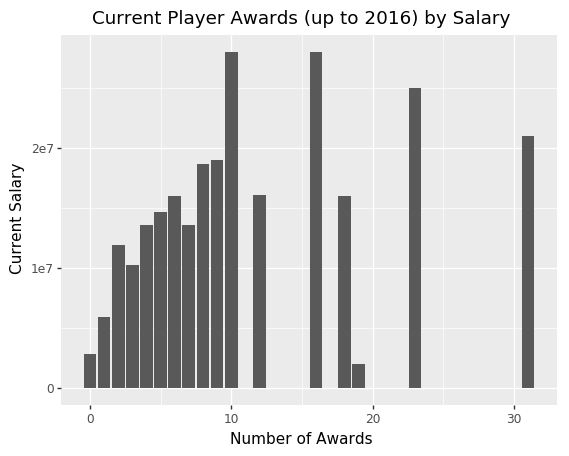

<ggplot: (-9223372029313572853)>

In [22]:
(
    ggplot(awards2016) + geom_bar(aes(x = "NumberofAwards", y = "salaryAvg"), stat = "identity")
    + labs(title = "Current Player Awards (up to 2016) by Salary", y = "Current Salary", x = "Number of Awards")
)

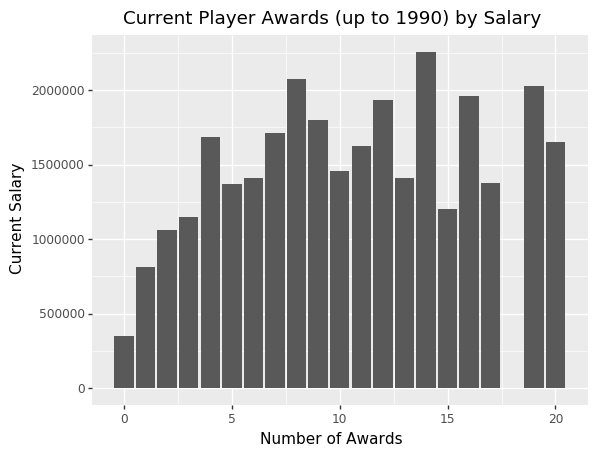

<ggplot: (7541114260)>

In [16]:
(
    ggplot(awards1990) + geom_bar(aes(x = "NumberofAwards", y = "salaryAvg"), stat = "identity")
    + labs(title = "Current Player Awards (up to 1990) by Salary", y = "Current Salary", x = "Number of Awards")
)

**Answer 2**

As shown by the bar charts of current player awards up to 2016 and salary, we can see that the graph suggests there is a relation between salary and number of accolades. As shown, there is an upward trend in salary with the rising number of rewards; however, do keep in mind that number of awards after 10 have less observations since the occurance is much rarer. With this, awards after 10 awards are less representative of the overall pattern and shouldn't be taken too seriously. For example, the observation of 31 awards is only represnted by one person and can't be related to the overall pattern due to small sample size. 

When taking a look at the old (1990) and modern (2016) MLB, we see signs of an upward trend of salary related to number of awards in both. Taking a look at number of awards 0 to 10, we can see a very apprent upward trend for both graphs. This suggests that in both the old and modern MLB, these accolades did persuade how much an MLB player was paid. All in all, I would hypothesize that these players are getting paid more since they're talents on the field can be concretely supplemented by the awards they've received. In short, it gives teams extra reason to believe that this player is talented and should be offered more. 

One thing to note about these observations is that an older date such as 1970 was not able to be used since before 1970, these types of accolades in the MLB did not exist; therefore, a relatively more current date was used to represent the old MLB.  

**Question 3:** From 2000 to 2016, how many all star appearance qualifying players does the championship team tend to have? How does this differ from other teams? 

In [17]:
#get world series winner per year during time period
#combine count all stars (playerid) group by
#join by yearid and teamid 

other = pd.read_sql("""SELECT NotWinner.yearid, NotWinner.teamid, AVG(IFNULL(NumberAllStars,0)) AS ASnumber, wswin FROM
((SELECT wswin, yearid, teamid FROM teams
WHERE yearid BETWEEN 2006 and 2016
AND
wswin = "N") AS NotWinner
LEFT JOIN
(SELECT COUNT(teamid) AS NumberAllStars, yearid, teamid FROM allstarfull
WHERE yearid BETWEEN 2006 and 2016
AND 
gp = 1 
GROUP BY teamid, yearid) AS allstar
ON allstar.yearid = NotWinner.yearid AND allstar.teamid = NotWinner.teamid)
GROUP BY NotWinner.yearid
;""", baseball)

champ = pd.read_sql("""SELECT winner.yearid, winner.teamid, NumberAllStars, wswin FROM
(SELECT wswin, yearid, teamid  FROM teams
WHERE yearid BETWEEN 2006 AND 2016
AND
wswin = "Y") AS winner
LEFT JOIN
(SELECT COUNT(teamid) AS NumberAllStars, yearid, teamid FROM allstarfull
WHERE yearid BETWEEN 2006 and 2016
AND 
gp = 1 
GROUP BY teamid, yearid) AS allstar
ON allstar.yearid = winner.yearid AND allstar.teamid = winner.teamid
;""", baseball)

#there must have been an occurance of more than one all star game in a year previously; however, for 2006-2016
#there has only been one all star game a year as shown by:
#allstar = pd.read_sql("""SELECT COUNT(gameNum) FROM allstarfull
#WHERE yearid BETWEEN 2000 and 2016
#GROUP BY gameNum
#;""", baseball)

In [18]:
other_average = pd.read_sql("""SELECT AVG(ASnumber) FROM 
(SELECT NotWinner.yearid, NotWinner.teamid, AVG(IFNULL(NumberAllStars,0)) AS ASnumber, wswin FROM
((SELECT wswin, yearid, teamid FROM teams
WHERE yearid BETWEEN 2006 and 2016
AND
wswin = "N") AS NotWinner
LEFT JOIN
(SELECT COUNT(teamid) AS NumberAllStars, yearid, teamid FROM allstarfull
WHERE yearid BETWEEN 2006 and 2016
AND 
gp = 1 
GROUP BY teamid, yearid) AS allstar
ON allstar.yearid = NotWinner.yearid AND allstar.teamid = NotWinner.teamid)
GROUP BY NotWinner.yearid)
;""", baseball)

winner_average = pd.read_sql("""SELECT AVG(NumberAllStars) FROM 
(SELECT winner.yearid, winner.teamid, NumberAllStars, wswin FROM
(SELECT wswin, yearid, teamid  FROM teams
WHERE yearid BETWEEN 2006 AND 2016
AND
wswin = "Y") AS winner
LEFT JOIN
(SELECT COUNT(teamid) AS NumberAllStars, yearid, teamid FROM allstarfull
WHERE yearid BETWEEN 2006 and 2016
AND 
gp = 1 
GROUP BY teamid, yearid) AS allstar
ON allstar.yearid = winner.yearid AND allstar.teamid = winner.teamid)
;""", baseball)

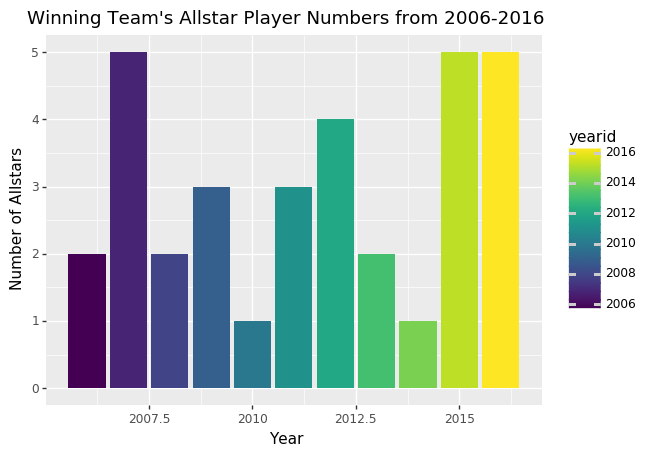

<ggplot: (-9223372029313666777)>

In [19]:
(
    ggplot(champ) 
    + geom_bar(aes(x = "yearid", y = "NumberAllStars", fill = "yearid"), stat = "identity")
    + labs(title = "Winning Team's Allstar Player Numbers from 2006-2016", y = "Number of Allstars", x = "Year")
)

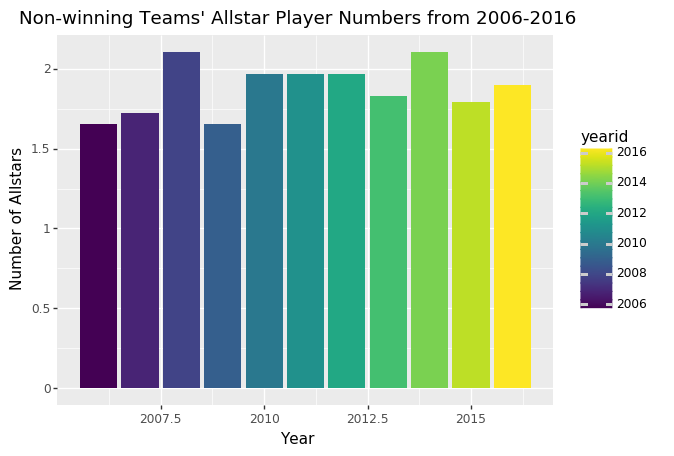

<ggplot: (7541114169)>

In [20]:
(
    ggplot(other) 
    + geom_bar(aes(x = "yearid", y = "ASnumber", fill = "yearid"), stat = "identity")
    + labs(title = "Non-winning Teams' Allstar Player Numbers from 2006-2016", y = "Number of Allstars", x = "Year")
)

**Answer 3**

Looking at the bar charts we can see that World Series winning teams during this time period tend to have more all stars than the averaged number of all stars of other teams. More specifically, winning teams on average have approximately 3 all stars while non-winning teams have, on average, approximately 1.87 all stars per team during this time period.

A few interesting things to notice about the winning teams' bar chart during this time period is that for two years, the winning team of the world series had below the average all stars for non-winning teams at one all star per those two teams. In addition, the overall distributions of the non-winning teams is more closely related since a large number of teams are involved rather than just one winning team and the number of all star spots is limited. 

Another thing that was taken into account was that there is a possibility for more than one all star game per year. This was accounted for by looking at each of the players during this period and checking they did not exceed more than one game played; therefore, this suggests that there is only one all star game per year during the 2006 to 2016 time period. 

In [23]:
baseball.close() 